OSTEOSARCOMA

In [1]:
from topological_bone_analysis import preprocessing_images as preprocess
from topological_bone_analysis import run_process 
from topological_bone_analysis import persistent_homology_SEDT as pers_hom
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import logging
from os import listdir, mkdir
from os.path import isfile, join, exists
logger = logging.getLogger("example")


ModuleNotFoundError: No module named 'topological_bone_analysis'

We need some preprocessing - what is a good binarization?

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
import skimage.filters as f

path = "/media/ysanne/TOSHIBA EXT/data/OS_SHG/"
save_path = "/media/ysanne/TOSHIBA EXT/data/OS_SHG/preprocessing/"

filenames = ["Female_A2_L14_SHG.tif", "Male_A2_K10_SHG.tif"]
# filenames = ["Female_A2_L4_SHG.tif",
#     "Female_A2_L13_SHG.tif",
#     "Female_A2_L14_SHG.tif",
#     "Female_A3_B1_SHG.tif",
#     "Female_A3_D3_SHG.tif",
#     "Female_A3_E3_SHG.tif",
#     "Male_A1_B2_SHG.tif",
#     "Male_A2_K10_SHG.tif",
#     "Male_A2_L8_SHG.tif",
#     "Male_A3_A3_SHG.tif",
#     "Male_A3_E2_SHG.tif",
#     "Male_A3_E10_SHG.tif"]
num = len(filenames)

images = []
for i in range(num):
    images.append(np.array(Image.open(path+filenames[i])))

otsu_images = []
minimum_images = []
frangi_images = []
sato_images = []
meijering_images= []
for i in range(num):
    otsu_im = preprocess.otsu_threshold(images[i])
    Image.fromarray(otsu_im).save(save_path+'otsu_'+filenames[i][:-4]+'.png')
    minimum_im = preprocess.minimum_threshold(images[i])
    Image.fromarray(minimum_im.astype(np.uint8)).save(save_path+'minimum_'+filenames[i][:-4]+'.png')
    frangi_im = f.frangi(images[i], sigmas=range(1, 10, 2), scale_range=None, scale_step=None, alpha=0.5, beta=0.5, gamma=15, black_ridges=True, mode='reflect', cval=0)
    Image.fromarray(frangi_im.astype(np.uint8)).save(save_path+'frangi_'+filenames[i][:-4]+'.png')
    sato_im = f.sato(images[i], sigmas=range(1, 10, 2), black_ridges=True, mode='reflect', cval=0)
    Image.fromarray(sato_im.astype(np.uint8)).save(save_path+'sato_'+filenames[i][:-4]+'.png')
    meijering_im = f.meijering(images[i], sigmas=range(1, 10, 2), alpha=None, black_ridges=True, mode='reflect', cval=0)
    Image.fromarray(meijering_im.astype(np.uint8)).save(save_path+'meijering_'+filenames[i][:-4]+'.png')
    otsu_images.append(otsu_im)
    minimum_images.append(minimum_im)
    frangi_images.append(frangi_im)
    sato_images.append(sato_im)
    meijering_images.append(meijering_im)

# image_sets = [images,otsu_images, minimum_images, frangi_images, sato_images,meijering_images]
image_sets = [images,otsu_images]
fig,ax = plt.subplots(1+len(image_sets),num)
for i in range(num):
    ax[0,i].imshow(images[i])
    ax[0,i].get_xaxis().set_visible(False)
    ax[0,i].get_yaxis().set_visible(False)
    for j in range(len(image_sets)):
        ax[j+1,i].imshow(image_sets[j][i],cmap='binary_r')
        ax[j+1,i].get_xaxis().set_visible(False)
        ax[j+1,i].get_yaxis().set_visible(False)


KeyboardInterrupt: 

Configure the parameters in order to run the SEDT porosity process on the SHG images

In [5]:
path = "/media/findlay/HDD/Ysanne_Backup/data/OS_SHG/"
feature_cols = [
    '0_num_points',
    '0_num_points_less_eq_-2',
    '0_avg_birth',
    '0_stddev_birth',
    '0_skew_birth',
    '0_percentile_25_birth',
    '0_percentile_75_birth',
    '0_iqr_birth',
    '0_avg_death',
    '0_stddev_death',
    '0_skew_death',
    '0_percentile_25_death',
    '0_percentile_75_death',
    '0_iqr_death',
    '0_pers_entropy',
    '1_num_points',
    '1_avg_birth',
    '1_stddev_birth',
    '1_skew_birth',
    '1_percentile_25_birth',
    '1_percentile_75_birth',
    '1_iqr_birth',
    '1_avg_death',
    '1_stddev_death',
    '1_skew_death',
    '1_percentile_25_death',
    '1_percentile_75_death',
    '1_iqr_death',
    '1_pers_entropy']
filenames_map = {
    "Female_A2_L4_SHG.tif":"CO, female",
    "Female_A2_L13_SHG.tif":"CO, female",
    "Female_A2_L14_SHG.tif":"CO, female",
    "Female_A3_B1_SHG.tif":"OS, female",
    "Female_A3_D3_SHG.tif":"OS, female",
    "Female_A3_E3_SHG.tif":"OS, female",
    "Male_A1_B2_SHG.tif":"CO, male",
    "Male_A2_K10_SHG.tif":"CO, male",
    "Male_A2_L8_SHG.tif":"CO, male",
    "Male_A3_A3_SHG.tif":"OS, male",
    "Male_A3_E2_SHG.tif":"OS, male",
    "Male_A3_E10_SHG.tif":"OS, male",
    }

Run the SEDT porosity process with above configs

In [6]:
stats_df, results = run_process.topological_porosity_analysis(
    path,
    logger,
    preprocess.otsu_threshold,
    patch_shape=None,
    stride=100,
    save_persistence_diagrams=False,
    analysis_plots=True,
    classification=False,
    feature_cols=feature_cols,
    filenames_map=filenames_map,
    runs=10,
    strat_col=None,
    cross_val='stratkfold',
    param_grid_SVC = {'C': [1,2,3], 'kernel': ('rbf','linear')}
)

Let's look at the histogram for a specific patch

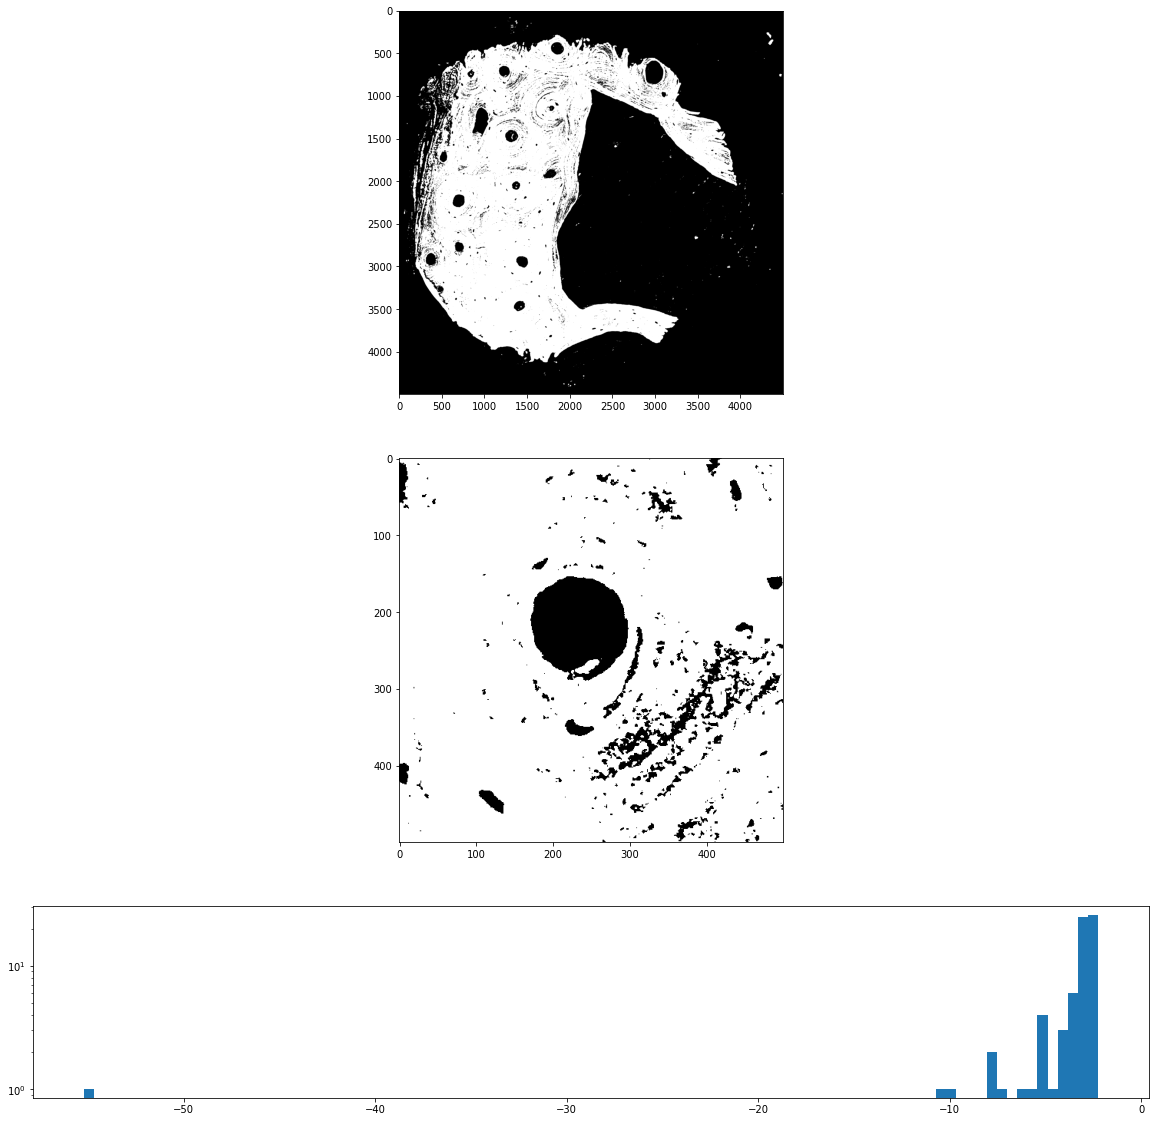

-55.226806640625


In [8]:
path = "/media/ysanne/TOSHIBA EXT/data/OS_SHG/2021_12_07_Time_20_05/"
name = "Female_A2_L14_SHG_011"
im_path = path + "patches/"+name+".tif"
interval_path = path + "persistence_intervals/PD_dim_0_" +name+".csv"
intervals = pd.read_csv(interval_path, header=None, names=['birth','death'])
Q2 = intervals[intervals['birth']<0]
Q2 =Q2[Q2['death']>0]
Q2_larger_2 = Q2[Q2['birth']<-2]

fig, ax = plt.subplots(3,1, gridspec_kw={'height_ratios': [4,4,2]})
ax[0].imshow(Image.open(path+'padded/'+name[:-4]+'.tif'), cmap='binary_r')
ax[1].imshow(Image.open(im_path), cmap='binary_r')
ax[2].hist(Q2_larger_2['birth'], bins=100, log=True) #WARNING I've limited births
plt.show()

print(Q2['birth'].min())

Let's look at a histogram of births larger than 20 for all patches
from healthy bone

In [86]:
interval_path = "/media/ysanne/TOSHIBA EXT/data/OS_SHG/2021_12_07_Time_20_05/persistence_intervals/"
filenames = [file for file in listdir(interval_path) if isfile(join(interval_path, file))]
filenames_dim0 = [file for file in filenames if int(file[7])==0]
healthy_filenames = [file for file in filenames_dim0 if file[16:22] in ['A2_L4_','A2_L13','A2_L14']]
healthy_filenames += [file for file in filenames_dim0 if file[14:20] in ['A1_B2_','A2_K10','A2_L8_']]

intervals_df = []
filenames_intervals_0 = []
for i in range(len(healthy_filenames)):
    if healthy_filenames[i][7] == '0':
        filenames_intervals_0.append(healthy_filenames[i])
        interval = pd.read_csv(interval_path+healthy_filenames[i], header=None, names=['birth','death'])
        interval['filename'] = healthy_filenames[i]
        intervals_df.append(interval)

intervals_df = pd.concat(intervals_df)
intervals_df['name'] = intervals_df['filename'].apply(lambda x: x[9:-8])
intervals_df['patch'] = intervals_df['filename'].apply(lambda x: x[-7:-4])
intervals_df['sex'] = intervals_df['filename'].apply(lambda x: x[9])
# intervals_df
# Q2 = intervals_df[intervals_df['birth']<0]
# Q2 =Q2[Q2['death']>0]
# # # Q2_larger_50 = Q2[Q2['birth']<-50]
# # # Q2_50_100 = Q2_larger_50[Q2_larger_50['birth']>-100]
# # # plt.hist(Q2['birth'], log=True, bins=100)
# Q2['birth'].hist(by=Q2['name'], bins=100, log=True)
# print(sorted([int(i) for i in set(intervals_df[intervals_df['name']=='Male_A2_L8_SHG']['patch'])]))

# get a list of boundary patches to exclude
coords_path = "/media/ysanne/TOSHIBA EXT/data/OS_SHG/2021_12_07_Time_20_05/patch_coords.csv"
coords = pd.read_csv(coords_path)
coords['max_row_coord'] = coords['image_shape_x']-coords['patch_height']
coords['max_col_coord'] = coords['image_shape_y']-coords['patch_width']
b1 = coords[coords['coord_array_col'] == 0.]
b2 = coords[coords['coord_array_row'] == 0.]
b3 = coords[coords['coord_array_col'] == coords['max_col_coord']]
b4 = coords[coords['coord_array_row'] == coords['max_row_coord']]
boundary = pd.concat([b1,b2,b3,b4])
boundary = boundary[['filename', 'patch_number']]
boundary['boundary'] = True
boundary_patches = coords.merge(boundary, on=['filename','patch_number'], how='left')

print(boundary_patches[boundary_patches['boundary']!=True])
# need to fill Nans with False

# merge on to Q2
# Q2.merge(boundary_patches, on=[])

# hist plot the non-boundary births for Q2

# where are the haversian canals?

# box plot comparison for healthy and non-healthy for haversian canals


                   filename  image_shape_x  image_shape_y  patch_number  \
5     Female_A2_L13_SHG.tif           4500           4500             6   
6     Female_A2_L13_SHG.tif           4500           4500             7   
7     Female_A2_L13_SHG.tif           4500           4500             8   
8     Female_A2_L13_SHG.tif           4500           4500             9   
9     Female_A2_L13_SHG.tif           4500           4500            10   
...                     ...            ...            ...           ...   
1041     Male_A3_E2_SHG.tif           5000           5000            83   
1042     Male_A3_E2_SHG.tif           5000           5000            84   
1043     Male_A3_E2_SHG.tif           5000           5000            85   
1044     Male_A3_E2_SHG.tif           5000           5000            86   
1045     Male_A3_E2_SHG.tif           5000           5000            87   

      patch_width  patch_height  coord_array_row  coord_array_col  \
5             500           50

Let's look at a couple example images, and their binary conversion

In [1]:
filenames = list(filenames_map.keys())
print(filenames)
path = "/media/findlay/HDD/Ysanne_Backup/data/OS_SHG/"
save_path = "/media/findlay/HDD/Ysanne_Backup/data/OS_SHG/OS_porosity_pynb/"
binary_path = save_path+'binary/'
if not exists(binary_path):
    mkdir(binary_path)
patch_path = save_path+'patch/'
if not exists(patch_path):
    mkdir(patch_path)

num = 4
OS_f = np.array(Image.open(path+filenames[0]))
OS_m = np.array(Image.open(path+filenames[3]))
CO_f = np.array(Image.open(path+filenames[6]))
CO_m = np.array(Image.open(path+filenames[9]))
images = [OS_f, OS_m, CO_f, CO_m]
files = [filenames[0], filenames[3], filenames[6], filenames[9]]

binary_images = []
for i in range(num):
    binary_im = preprocess.otsu_threshold(images[i])
    Image.fromarray(binary_im.astype(np.uint8)).save(save_path+'binary/'+files[i])
    binary_images.append(binary_im)

fig,ax = plt.subplots(2,num)
for i in range(num):
    ax[0,i].imshow(images[i])
    ax[1,i].imshow(binary_images[i], cmap='binary_r')
    ax[0,i].get_xaxis().set_visible(False)
    ax[1,i].get_xaxis().set_visible(False)
    ax[0,i].get_yaxis().set_visible(False)
    ax[1,i].get_yaxis().set_visible(False)
plt.show()

NameError: name 'filenames_map' is not defined

Now let's take a patch of each

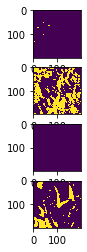

In [ ]:
patches = []
for i in range(num):
    patch = binary_images[i][800:1000,800:1000]
    Image.fromarray(patch.astype(np.uint8)).save(save_path+'patch/'+files[i])
    patches.append(patch)

fig, ax = plt.subplots(num,1)
for i in range(num):
    ax[i].imshow(patches[i], cmap='binary_r')
plt.show()

Convert to SEDT and display, then run persistent homology

In [ ]:
SEDT_patches = []
for i in range(num):
    SEDT_patch = preprocess.SEDT(patches[i])
    SEDT_patches.append(SEDT_patch)

from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
# make custom colourmap, set zero as midpoint
specific_colors = LinearSegmentedColormap.from_list('name',
    [(0,'k'),(0.3,'b'),(0.5,'w'),(0.8,'g'),(1,'k')],N=1000)

fig, ax = plt.subplots(1,num,gridspec_kw = {'wspace':0.5, 'hspace':0.5}, figsize=(10,10))
for i in range(num):
    SEDT_patch = SEDT_patches[i]
    vmin, vcenter, vmax = np.min(SEDT_patch), 0, np.max(SEDT_patch)
    divnorm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax) 
    im = ax[i].imshow(SEDT_patch, cmap=specific_colors, norm=divnorm)
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(im, cax=cax,orientation='vertical', ticks=[vmin,0,vmax])

idiagram_path= save_path+'idiagrams/'
interval_path = path+'persistence_intervals/'
if not exists(idiagram_path):
    mkdir(idiagram_path)
if not exists(interval_path):
    mkdir(interval_path)

for i in range(len(SEDT_patches)):
    SEDT_patch = SEDT_patches[i]
    name = f"{files[i][:-4]}_SEDT"
    pers_hom.peristent_homology_sublevel_cubic(
        SEDT_patch,
        name,
        path,
        plot_persistence_diagrams=False)
        

Now we can look at the histograms (on a log scale) for H0 quadrant 2

In [ ]:
intervals = []
for i in range(num):
    vals = pd.read_csv(
        interval_path+files[i],
        header=None,
        names=['birth','death']
    )
    vals['filename'] = files[i]
    intervals.append(vals)

intervals = pd.concat(intervals)
Q2 = intervals.iloc[intervals['birth']<= 0]
Q2 = Q2.iloc[Q2['death']>0]

fig,ax = plt.subplots(1,num)
for i in range(num):
    df = Q2.iloc[Q2['filename']==files[i]]
    ax[i].hist(df, log=True)
plt.show()


We see a spike where?
This should relate to Haversian canals in healthy bone?

In [ ]:
# plot the inverses of the large ones to check sizes.